## Importing Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, integrate
from sklearn import linear_model, datasets
%matplotlib inline

## Output class dictionary

In [10]:
class_label = {
                1:'WALKING',
                2:'WALKING_UPSTAIRS',
                3:'WALKING_DOWNSTAIRS',
                4:'SITTING',
                5:'STANDING',
                6:'LAYING'
              };

## Loading Dataset (Training)

In [11]:
# Read the Feature Info
feature_info_file_name = "../dataset/features.txt";
feature_info_file = open(feature_info_file_name,'r');
feature_name = feature_info_file.read().splitlines();
print 'Number of Features : {}\n'.format(len(feature_name));

# Read the Training data
df_X_train = pd.read_csv('../dataset/train/X_train.txt',names=feature_name,header=None,delim_whitespace=True);
df_X_test  = pd.read_csv('../dataset/test/X_test.txt',names=feature_name,header=None,delim_whitespace=True);

# Read training outputs
df_y_train = pd.read_csv('../dataset/train/y_train.txt',names=['activity'],header=None);
df_y_test = pd.read_csv('../dataset/test/y_test.txt',names=['activity'],header=None);

Number of Features : 561



In [12]:
df_X_train.head()

tBodyAcc_mean_X  tBodyAcc_mean_Y  tBodyAcc_mean_Z  tBodyAcc_std_X  \
0         0.288585        -0.020294        -0.132905       -0.995279   
1         0.278419        -0.016411        -0.123520       -0.998245   
2         0.279653        -0.019467        -0.113462       -0.995380   
3         0.279174        -0.026201        -0.123283       -0.996091   
4         0.276629        -0.016570        -0.115362       -0.998139   

   tBodyAcc_std_Y  tBodyAcc_std_Z  tBodyAcc_mad_X  tBodyAcc_mad_Y  \
0       -0.983111       -0.913526       -0.995112       -0.983185   
1       -0.975300       -0.960322       -0.998807       -0.974914   
2       -0.967187       -0.978944       -0.996520       -0.963668   
3       -0.983403       -0.990675       -0.997099       -0.982750   
4       -0.980817       -0.990482       -0.998321       -0.979672   

   tBodyAcc_mad_Z  tBodyAcc_max_X         ...           \
0       -0.923527       -0.934724         ...            
1       -0.957686       -0.943068         ...            
2       -0.977469       -0.938692         ...            
3       -0.989302       -0.938692         ...            
4       -0.990441       -0.942469         ...            

   fBodyBodyGyroJerkMag_meanFreq  fBodyBodyGyroJerkMag_skewness  \
0                      -0.074323                      -0.298676   
1                       0.158075                      -0.595051   
2                       0.414503                      -0.390748   
3                       0.404573                      -0.117290   
4                       0.087753                      -0.351471   

   fBodyBodyGyroJerkMag_kurtosis  angle_tBodyAccMean_gravity_  \
0                      -0.710304                    -0.112754   
1                      -0.861499                     0.053477   
2                      -0.760104                    -0.118559   
3                      -0.482845                    -0.036788   
4                      -0.699205                     0.123320   

   angle_tBodyAccJerkMean_gravityMean  angle_tBodyGyroMean_gravityMean  \
0                            0.030400                        -0.464761   
1                           -0.007435                        -0.732626   
2                            0.177899                         0.100699   
3                           -0.012892                         0.640011   
4                            0.122542                         0.693578   

   angle_tBodyGyroJerkMean_gravityMean  angle_X_gravityMean  \
0                            -0.018446            -0.841247   
1                             0.703511            -0.844788   
2                             0.808529            -0.848933   
3                            -0.485366            -0.848649   
4                            -0.615971            -0.847865   

   angle_Y_gravityMean  angle_Z_gravityMean  
0             0.179941            -0.058627  
1             0.180289            -0.054317  
2             0.180637            -0.049118  
3             0.181935            -0.047663  
4             0.185151            -0.043892  

[5 rows x 561 columns]

## Logistic Regression (all features , L2 regularization)
- Reference: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- Multinomial LR: https://en.wikipedia.org/wiki/Multinomial_logistic_regression

value of lambda = 1

#### Initialize training and testing data

In [13]:
# Extract training features and outputs
X_train = df_X_train.values;
y_train = df_y_train.activity;
X_test = df_X_test.values;
y_test = df_y_test.activity;

#### Fit Logistic regression model

In [14]:
# Fit Multinomial regression model
logreg = linear_model.LogisticRegression(); #Lambda = 1
logreg.fit(X_train,y_train);
#np.set_printoptions(threshold=5);

#### Predict the outputs and measure performance
- Performance = Percentage of accurately predicted samples

In [15]:
# Predict outcomes for training and testing data
y_hat_train = logreg.predict(X_train);
y_hat_test = logreg.predict(X_test);

# Measure model accuracy on training and testing data
accuracy_train = 100*np.mean(y_hat_train==y_train);
accuracy_test  = 100*np.mean(y_hat_test==y_test);

print 'Accuracy on Training data is {}%'.format(accuracy_train);
print 'Accuracy on Testing data  is {}%'.format(accuracy_test);

Accuracy on Training data is 99.0750816104%
Accuracy on Testing data  is 96.1995249406%


## Logistic Regression (all features , L1 regularization)
Value of lambda = 1

In [16]:
# Fit Multinomial regression model
logreg_l1 = linear_model.LogisticRegression(penalty='l1'); #Lambda = 1
logreg_l1.fit(X_train,y_train);

# Predict outcomes for training and testing data
y_hat_train = logreg_l1.predict(X_train);
y_hat_test = logreg_l1.predict(X_test);

# Measure model accuracy on training and testing data
accuracy_train = 100*np.mean(y_hat_train==y_train);
accuracy_test  = 100*np.mean(y_hat_test==y_test);

print 'Accuracy on Training data is {}%'.format(accuracy_train);
print 'Accuracy on Testing data  is {}%'.format(accuracy_test);

Accuracy on Training data is 99.1838955386%
Accuracy on Testing data  is 96.1655921276%


## Logistic regression with L2 regularizer (lambda sweep)
The goal of this section is to perform logistic regression with various values of lambda.  
The regularizer used is **L2**

In [17]:
# Initialize regularization parameter
lmda = np.arange(-5,3,dtype=float);
lmda = np.power(10,lmda);
reg_param = np.power(lmda,-1);
accuracy_train_list_l2 = list();
accuracy_test_list_l2 = list();

for c in reg_param:
    # Model fitting
    logreg = linear_model.LogisticRegression(C=c);
    logreg.fit(X_train,y_train);
    
    # Output prediction
    y_hat_train = logreg.predict(X_train);
    y_hat_test = logreg.predict(X_test);
    
    # Performance measurement
    accuracy_train = 100*np.mean(y_hat_train==y_train);
    accuracy_test  = 100*np.mean(y_hat_test==y_test);
    
    accuracy_train_list_l2.append(accuracy_train);
    accuracy_test_list_l2.append(accuracy_test);


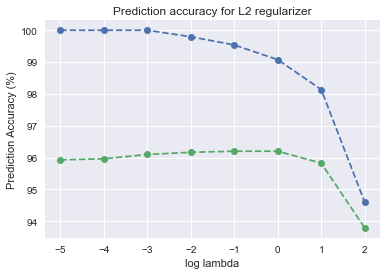

In [18]:
# Plot performance for various regularization parameters

plt.figure(1);
plt.plot(np.log10(lmda),accuracy_train_list_l2,'o--');
plt.plot(np.log10(lmda),accuracy_test_list_l2,'o--');
plt.xlabel('log lambda');
plt.ylabel('Prediction Accuracy (%)');
plt.title('Prediction accuracy for L2 regularizer');
plt.show();

## Logistic regression with L1 regularizer (lambda sweep)
The goal of this section is to perform logistic regression with various values of lambda.  
The regularizer used is **L1**

In [19]:
# Initialize regularization parameter
lmda = np.arange(-5,3,dtype=float);
lmda = np.power(10,lmda);
reg_param = np.power(lmda,-1);
accuracy_train_list_l1 = list();
accuracy_test_list_l1 = list();

for c in reg_param:
    # Model fitting
    logreg = linear_model.LogisticRegression(penalty='l1',C=c);
    logreg.fit(X_train,y_train);
    
    # Output prediction
    y_hat_train = logreg.predict(X_train);
    y_hat_test = logreg.predict(X_test);
    
    # Performance measurement
    accuracy_train = 100*np.mean(y_hat_train==y_train);
    accuracy_test  = 100*np.mean(y_hat_test==y_test);
    
    accuracy_train_list_l1.append(accuracy_train);
    accuracy_test_list_l1.append(accuracy_test);


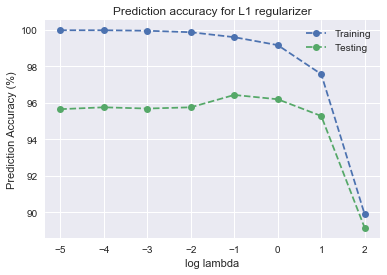

In [20]:
# Plot performance for various regularization parameters

plt.figure(1);
plt.plot(np.log10(lmda),accuracy_train_list_l1,'o--');
plt.plot(np.log10(lmda),accuracy_test_list_l1,'o--');
plt.xlabel('log lambda');
plt.ylabel('Prediction Accuracy (%)');
plt.title('Prediction accuracy for L1 regularizer');
plt.legend(['Training','Testing']);
plt.show();

## Comparision of L1 v/s L2 regularizer

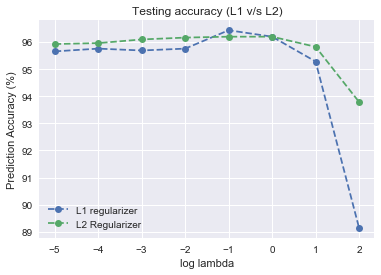

In [21]:
# Plot combined performance (L1 versus L2)
plt.figure();
plt.plot(np.log10(lmda),accuracy_test_list_l1,'o--');
plt.plot(np.log10(lmda),accuracy_test_list_l2,'o--');
plt.xlabel('log lambda');
plt.ylabel('Prediction Accuracy (%)');
plt.title('Testing accuracy (L1 v/s L2)');
plt.legend(['L1 regularizer','L2 Regularizer']);
plt.show();

# Conclusion
- From the above plot it can be seen that best testing accuracy is obtained for L1 regularizer with lambda = 0.1
- As lambda increases training accuracy decreases , but testing accuracy first increases, reaches a maximum value and then decreases. This maximum value is what we are looking for. The motivation to perform lambda sweep was to find the optimum value of lambda which gives us the best accuracy on the testing data